In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Carga y revisión general de variables

In [2]:
df_ofertas = pd.read_csv('../data/ofertas_relampago.csv')

In [3]:
df_ofertas.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


In [4]:
df_ofertas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

De la información que provee la función info, se puede determinar que la tabla contiene 48746 registros y 12 columnas. Casi todas se encuentran definidas como objeto, por lo que habrá que cambiar el tipo a fecha/datetime a las 3 primeras. Las únicas columnas que cuentan con valores nulos son las que corresponden al stock, cantidades y montos vendidos, así como también el origen.

In [5]:
##Convertimos las columnas a formato datetime
df_ofertas.iloc[:, 0:3] = df_ofertas.iloc[:, 0:3].apply(pd.to_datetime)

In [6]:
df_ofertas.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


In [7]:
### Verificamos cuales son los valores únicos cuando la columna es del tipo objeto
for col in df_ofertas.columns:
    if df_ofertas[col].dtype == 'O':
        print(f'La columna {col} tiene {df_ofertas[col].nunique()} valores únicos: {df_ofertas[col].unique()} \n')

La columna OFFER_TYPE tiene 1 valores únicos: ['lightning_deal'] 

La columna ORIGIN tiene 1 valores únicos: ['A' nan] 

La columna SHIPPING_PAYMENT_TYPE tiene 2 valores únicos: ['none' 'free_shipping'] 

La columna DOM_DOMAIN_AGG1 tiene 36 valores únicos: ['PETS FOOD' 'PET PRODUCTS' 'COMPUTERS' 'ELECTRONICS' 'APPAREL' 'PARTY'
 'TOYS AND GAMES' 'PERSONAL CARE' 'INDUSTRY' 'TOOLS AND CONSTRUCTION'
 'HOME&DECOR' 'SPORTS' 'BOOKS, MULTIMEDIA & OTHER E!' 'AUTOPARTS' 'DRINKS'
 'FOOTWEAR' 'WHEELS & TIRES' 'BEAUTY EQUIPMENT' 'MOBILE'
 'APPAREL ACCESORIES' 'FOODS' 'PHARMACEUTICS' 'STATIONARY' 'BABY'
 'PERSONAL HYGIENE' 'OTHER' 'VEHICULAR MULTIMEDIA' 'SUPLEMENTS' 'SECURITY'
 'MOTOPARTS' 'CLEANING' 'ACC TOOLS' 'MUSICAL INSTRUMENTS'
 'ANTIQUES & HOBBIES' 'BATTERIES' 'AGRO'] 

La columna VERTICAL tiene 9 valores únicos: ['CPG' 'OTHERS' 'CE' 'APP & SPORTS' 'T & B' 'BEAUTY & HEALTH'
 'HOME & INDUSTRY' 'ENTERTAINMENT' 'ACC'] 

La columna DOMAIN_ID tiene 1266 valores únicos: ['MLM-BIRD_FOODS' 'MLM-ANIMA

De los valores únicos se puede decir lo siguiente:
- OFFER_TYPE no brinda información, ya que tiene un único valor
- ORIGIN pareciera indicar el origen del producto, que puedo ser Argentina (A) u otro (cuando es nulo)
- SHIPPING_PAYMENT_TYPE permite distinguir si el producto tiene un costo de envío (cuando el valor es nulo) o no (cuando indica que es free_shipping), por lo que se puede llegar a identificar cuales productos son de envío gratuito.
- DOM_DOMAIN_AGG1 es la categoría de los productos (DOMAIN_ID)
- Por su parte, se podría considerar a VERTICAL como los segmentos que agrupan a las diferentes categorías.
- Por último, DOMAIN_ID indicaría cual es la mayor desagregación posible de todos los productos. La cantidad de valores únicos es menor que la cantidad de filas, por lo que se puede suponer que cada producto tuvo distinta cantidad de ofertas

## Análisis de valores nulos, de segmentos, categorías y creación de variables

Tratamos de completar los valores nulos, al menos las columnas que permiten hacerlo

In [8]:
##Verificamos una muestra de registros cuando la cantidad vendida es nula
df_ofertas[df_ofertas['SOLD_QUANTITY'].isnull()].head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
5,2021-06-22,2021-06-22 18:00:00+00:00,2021-06-23 01:00:12+00:00,lightning_deal,23,23,NaN,NaN,A,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
6,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,10,10,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,lightning_deal,10,-1,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
11,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:00:04+00:00,lightning_deal,15,15,NaN,NaN,NaN,none,ELECTRONICS,CE,MLM-ELECTRONIC_PRODUCTS


Se supone que stock remanente es el que se obtiene al restar el stock involucrado y las cantidades vendida, por lo que se pueden calcular las cantidades vendidas a partir de los stocks.

In [9]:
##Se completan los nulos de cantidades vendidas a partir de la diferencia de stock al inicio y al final
df_ofertas['SOLD_QUANTITY'] = df_ofertas['SOLD_QUANTITY'].fillna(df_ofertas['INVOLVED_STOCK']- df_ofertas['REMAINING_STOCK_AFTER_END'])

El monto vendido (SOLD_AMOUNT) se puede determinar a partir del precio unitario y las cantidades vendidas, pero no se cuenta con el primero. Si bien se podría calcular el precio unitario promedio por producto, el problema que surge es que cada producto puede tener un precio diferente por el tipo de descuento que se hace y por el momento en que se realiza la oferta. Esto último lo podemos verificar calculando la primera y la última fecha de las ofertas, utilizando distintas agregaciones.

In [10]:
df_ofertas.groupby('DOM_DOMAIN_AGG1', as_index=False).agg(min_date = ('OFFER_START_DATE','min'),
                                                          max_date = ('OFFER_START_DATE','max'))

,DOM_DOMAIN_AGG1,min_date,max_date
0,ACC TOOLS,2021-06-01,2021-07-31
1,AGRO,2021-06-03,2021-06-03
2,ANTIQUES & HOBBIES,2021-06-01,2021-06-05
3,APPAREL,2021-06-01,2021-07-31
4,APPAREL ACCESORIES,2021-06-01,2021-07-31
5,AUTOPARTS,2021-06-01,2021-07-31
6,BABY,2021-06-01,2021-07-31
7,BATTERIES,2021-06-01,2021-07-31
8,BEAUTY EQUIPMENT,2021-06-01,2021-07-31
9,"BOOKS, MULTIMEDIA & OTHER E!",2021-06-01,2021-07-31


La agregación de los ids indican que en general, los productos tuvieron ofertas entre 2 meses (junio y julio) de 2021, con excepción de la categoria Other que comprendió más de 1 año. A continuación se hace una desagregación mayor, que nos permitirá identificar cuantos de los 1266 productos tuvieron ofertas en un periodo mayor a 1 mes.

In [11]:
##Se agrupa por producto, determinando la fecha minima y maxima de las ofertas
periodo_ofertas = df_ofertas.groupby('DOMAIN_ID', as_index=False).agg(min_date = ('OFFER_START_DATE','min'),
                                                          max_date = ('OFFER_START_DATE','max'))

##Se calcula la cantidad de días de cada plazo
periodo_ofertas['plazo'] = (periodo_ofertas['max_date'] - periodo_ofertas['min_date']).dt.days

In [12]:
print('Productos que tuvieron ofertas durante un plazo igual o mayor a 30 dias: ' + str(periodo_ofertas[periodo_ofertas['plazo'] >= 30].shape[0]))

Productos que tuvieron ofertas durante un plazo igual o mayor a 30 dias: 483


Debido a que aproximadamente un tercio de los productos tuvo ofertas en un plazo mayor a 30 días, no se podría completar los nulos con el precio promedio de cada producto pero si se puede completar con el que figura en la oferta inmediata anterior. Por ejemplo, si una oferta de un producto se realizó el 22 de junio pero no cuenta con el precio unitario, se completaría con el de la oferta previa del mismo producto.

Para realizar esto, se ordenan las ofertas por id del producto y por la fecha. Luego se calcula el precio unitario y se determinan cuales son los productos que tuvieron cantidades vendidas y que no tienen precio. Se utiliza esta condición porque no resulta relevante (en principio) el precio unitario de una oferta que no tuvo ventas.

In [13]:
##Se ordenan las ofertas por producto y fecha
df_ofertas = df_ofertas.sort_values(['DOMAIN_ID', 'OFFER_START_DTTM'], ascending = [True, True])

##En el caso que las cantidades vendidas sean nulas, el monto vendido tambien será nulo

df_ofertas['SOLD_AMOUNT'] = np.where(df_ofertas['SOLD_QUANTITY'] == 0, 0, df_ofertas['SOLD_AMOUNT'])

In [14]:
## Calculamos el precio unitario como monto vendido dividido cantidad vendida
df_ofertas['price'] = df_ofertas['SOLD_AMOUNT'].div(df_ofertas['SOLD_QUANTITY'])

In [15]:
###Determinamos los productos que tuvieron ventas pero no se puede determinar los montos ni los precios unitarios
lista_prod_null = df_ofertas[(df_ofertas['SOLD_QUANTITY'] > 0) & (df_ofertas['price'].isnull())]['DOMAIN_ID'].unique().tolist()

In [16]:
##Hacemos un loop para poder asignar el precio de la oferta anterior, siempre y cuando se corresponda al mismo producto
for product_id in lista_prod_null:

    df_ofertas.loc[(df_ofertas['SOLD_QUANTITY'] > 0) & (df_ofertas['DOMAIN_ID'] == product_id), 'price'] = \
        df_ofertas.loc[(df_ofertas['SOLD_QUANTITY'] > 0) & (df_ofertas['DOMAIN_ID'] == product_id)]['price'].fillna(method='ffill')

In [17]:
## Se asigna precio igual a 0 cuando el precio es nulo y las cantidades vendidas fueron nulas
df_ofertas.loc[(df_ofertas['price'].isnull()) & (df_ofertas['SOLD_AMOUNT'] == 0), 'price'] = 0

A partir de contar con un precio aproximado, podemos calcular el monto tambien. Al menos para los productos que habían tenido ventas pero que no contaban con la información.

In [18]:
##Se agrega la variable de monto de ventas para cada oferta
df_ofertas['Sold_Amount_fix'] = df_ofertas['SOLD_QUANTITY'].multiply(df_ofertas['price'])

También es posible calcular variables de la duración de la oferta y de la tasa de exito de las ventas. Esta última permite saber que porcentaje del stock involucrado en la oferta fue vendido

In [19]:
##Duracion de cada oferta (en horas)
df_ofertas['offer_duration'] = (df_ofertas['OFFER_FINISH_DTTM'] - df_ofertas['OFFER_START_DTTM']) / pd.Timedelta(hours=1)

In [20]:
##Tasa de exito
df_ofertas['success_rate'] = df_ofertas['SOLD_QUANTITY'].div(df_ofertas['INVOLVED_STOCK']) * 100

Si bien se pueden crear muchas más variables, solamente se crearan 2 adicionales que permiten determinar el horario de comienzo de la oferta así como el día de la semana y ver en que días y horarios es más frecuente que surjan

In [21]:
##Dia de comienzo de la oferta
df_ofertas['weekday'] = df_ofertas['OFFER_START_DTTM'].dt.day_name()
##Horario de comienzo de la oferta
df_ofertas['offer_hour_start'] = df_ofertas['OFFER_START_DTTM'].dt.hour

In [22]:
df_ofertas.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,price,Sold_Amount_fix,offer_duration,success_rate,weekday,offer_hour_start
39898,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 07:00:32+00:00,lightning_deal,15,15,0.0,0.0,NaN,free_shipping,COMPUTERS,CE,MLM-3D_PENS,0.0,0.0,0.008889,0.0,Tuesday,7
2357,2021-06-02,2021-06-02 13:00:00+00:00,2021-06-02 19:00:06+00:00,lightning_deal,5,5,0.0,0.0,NaN,free_shipping,COMPUTERS,CE,MLM-3D_PRINTERS,0.0,0.0,6.001667,0.0,Wednesday,13
29433,2021-06-04,2021-06-04 07:00:00+00:00,2021-06-04 13:00:02+00:00,lightning_deal,5,5,0.0,0.0,NaN,free_shipping,COMPUTERS,CE,MLM-3D_PRINTER_FILAMENTS,0.0,0.0,6.000556,0.0,Friday,7
29431,2021-06-04,2021-06-04 19:00:00+00:00,2021-06-05 01:00:00+00:00,lightning_deal,10,10,0.0,0.0,NaN,none,COMPUTERS,CE,MLM-3D_PRINTER_NOZZLES,0.0,0.0,6.000000,0.0,Friday,19
2666,2021-06-02,2021-06-02 07:00:00+00:00,2021-06-02 13:00:00+00:00,lightning_deal,15,15,0.0,0.0,NaN,free_shipping,BEAUTY EQUIPMENT,BEAUTY & HEALTH,MLM-ABDOMINAL_TONING_BELTS,0.0,0.0,6.000000,0.0,Wednesday,7


In [23]:
##Verificamos como se encuentran agrupadas las ofertas con el mayor nivel de agregación
df_ofertas.groupby(['VERTICAL', 'DOM_DOMAIN_AGG1'], as_index=False).agg('size')

,VERTICAL,DOM_DOMAIN_AGG1,size
0,ACC,ACC TOOLS,95
1,ACC,AGRO,1
2,ACC,AUTOPARTS,1696
3,ACC,MOTOPARTS,641
4,ACC,VEHICULAR MULTIMEDIA,104
5,ACC,WHEELS & TIRES,36
6,APP & SPORTS,APPAREL,3856
7,APP & SPORTS,APPAREL ACCESORIES,4387
8,APP & SPORTS,FOOTWEAR,1516
9,APP & SPORTS,SPORTS,3289


A partir del cuadro se observa que la categoría con mayor cantidad de ofertas fue Home&Decor, con un total de 6742 ofertas, siendo la segunda Apparel Accesories con 4387 ofertas.
A continuación se realiza un conteo de ofertas pero a nivel de producto (es decir, con la mayor desagregación posible).

In [24]:
##El cuadro a continuación muestra la mayor desagregación posible y en que categoría superior se encuentra 
##cada uno de ellos. Solo se expone los primeros 10 productos con más ofertas
df_ofertas.groupby(['VERTICAL', 'DOM_DOMAIN_AGG1', 'DOMAIN_ID'], as_index=False).agg('size') \
        .sort_values('size', ascending=False).head(10)

,VERTICAL,DOM_DOMAIN_AGG1,DOMAIN_ID,size
419,BEAUTY & HEALTH,PHARMACEUTICS,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,1759
446,CE,COMPUTERS,MLM-HEADPHONES,761
834,HOME & INDUSTRY,HOME&DECOR,MLM-LED_STRIPS,518
148,APP & SPORTS,APPAREL ACCESORIES,MLM-SUNGLASSES,472
43,ACC,AUTOPARTS,MLM-VEHICLE_LED_BULBS,454
169,APP & SPORTS,FOOTWEAR,MLM-SNEAKERS,453
158,APP & SPORTS,APPAREL ACCESORIES,MLM-WRISTWATCHES,432
884,HOME & INDUSTRY,HOME&DECOR,MLM-TABLE_AND_DESK_LAMPS,411
988,HOME & INDUSTRY,STATIONARY,MLM-MARKERS_AND_HIGHLIGHTERS,405
599,CE,MOBILE,MLM-SMARTWATCHES,390


Considerando el momento de las ofertas, los dos primeros resultados pueden estar relacionados a las medidas de confinamiento de la epoca. Por un lado, las máscaras/barbijos y por el otro, los auriculares que pueden estar vinculados al todo lo remoto (home office, clases online, etc.)

In [25]:
### Si por cada uno de los productos se cuenta la cantidad de ofertas que hubo, se determina cuantos de ellos tuvieron
## más de 1 oferta
cant_ofertas_id = df_ofertas.groupby(['DOMAIN_ID'], as_index=False).agg(cant_ofertas= ('OFFER_START_DTTM','nunique'))

cant_ofertas_id[cant_ofertas_id['cant_ofertas'] > 1].shape

(853, 2)

En base al filtrado anterior se puede observar que de los 1266 productos, hubo 853 productos con más de una oferta. Tanbién se pueden analizar las ofertas en base a su origen y al costo del envío.

In [26]:
##Cantidad de oferta de productos de origen nacional (A) e importado
df_ofertas.groupby(['ORIGIN'], as_index=False, dropna=False).agg(productos_unicos=('DOMAIN_ID','nunique'))

,ORIGIN,productos_unicos
0,A,659
1,NaN,1047


In [27]:
##Cantidad de oferta de productos de origen nacional (A) e importado
df_ofertas.groupby(['SHIPPING_PAYMENT_TYPE'], as_index=False, dropna=False).agg('size')

,SHIPPING_PAYMENT_TYPE,size
0,free_shipping,26658
1,none,22088


A partir de las tablas anteriores, se puede observar que:
- las ofertas de productos fue principalmente de productos de origen importado (o al menos de origen desconocido), ya que casi duplica a la cantidad de productos nacionales (1047 versus 659)
- Si se considera el tipo de envío, la mayoría de las ofertas tenían envío gratuito.

## Análisis gráfico de segmentos y categorías

Por último realizamos los gráficos que nos van a permitir conocer la distribución de ciertas variables de las ofertas, segúm distintos niveles de agrupación

In [28]:
def sub_plots(dataframe, nivel_1, nivel_2, variable, tipo):
    """Grafica subplots a partir de un dataframe y los distintos niveles de agregación, siendo el nivel 1 el que agrupa
    a los de nivel 2. Se debe proveer el nombre de la variable y el tipo de grafico, siendo los graficos posibles
    boxplot o barplot
    """

    # Create a 3x3 grid of boxplots
    plt.figure(figsize=(20, 20))

    lista_nivel_1 = dataframe[nivel_1].unique().tolist()
    
    ##Hace un loop para poder graficar cada uno de los subplots
    for i, nivel in enumerate(lista_nivel_1):
        plt.subplot(3, 3, i + 1)
        
        if tipo == 'boxplot':
            sns.boxplot(x=nivel_2, y=variable, data=dataframe[dataframe[nivel_1] == nivel][[nivel_2, variable]])
        else:
            sns.barplot(x=nivel_2, y=variable, data=dataframe[dataframe[nivel_1] == nivel][[nivel_2, variable]], estimator=sum, ci=None)
        ##Seteamos la configuración de los graficos (etiqueta del eje x, orientacion de las etiquetas de cada categoria
        ## y titulo)
        plt.xlabel('')
        plt.xticks(rotation=45)
        plt.title(f'{nivel}')

    plt.tight_layout()
    plt.show()

Se grafican los boxplots de cada vertical de la tasa de éxito de la oferta

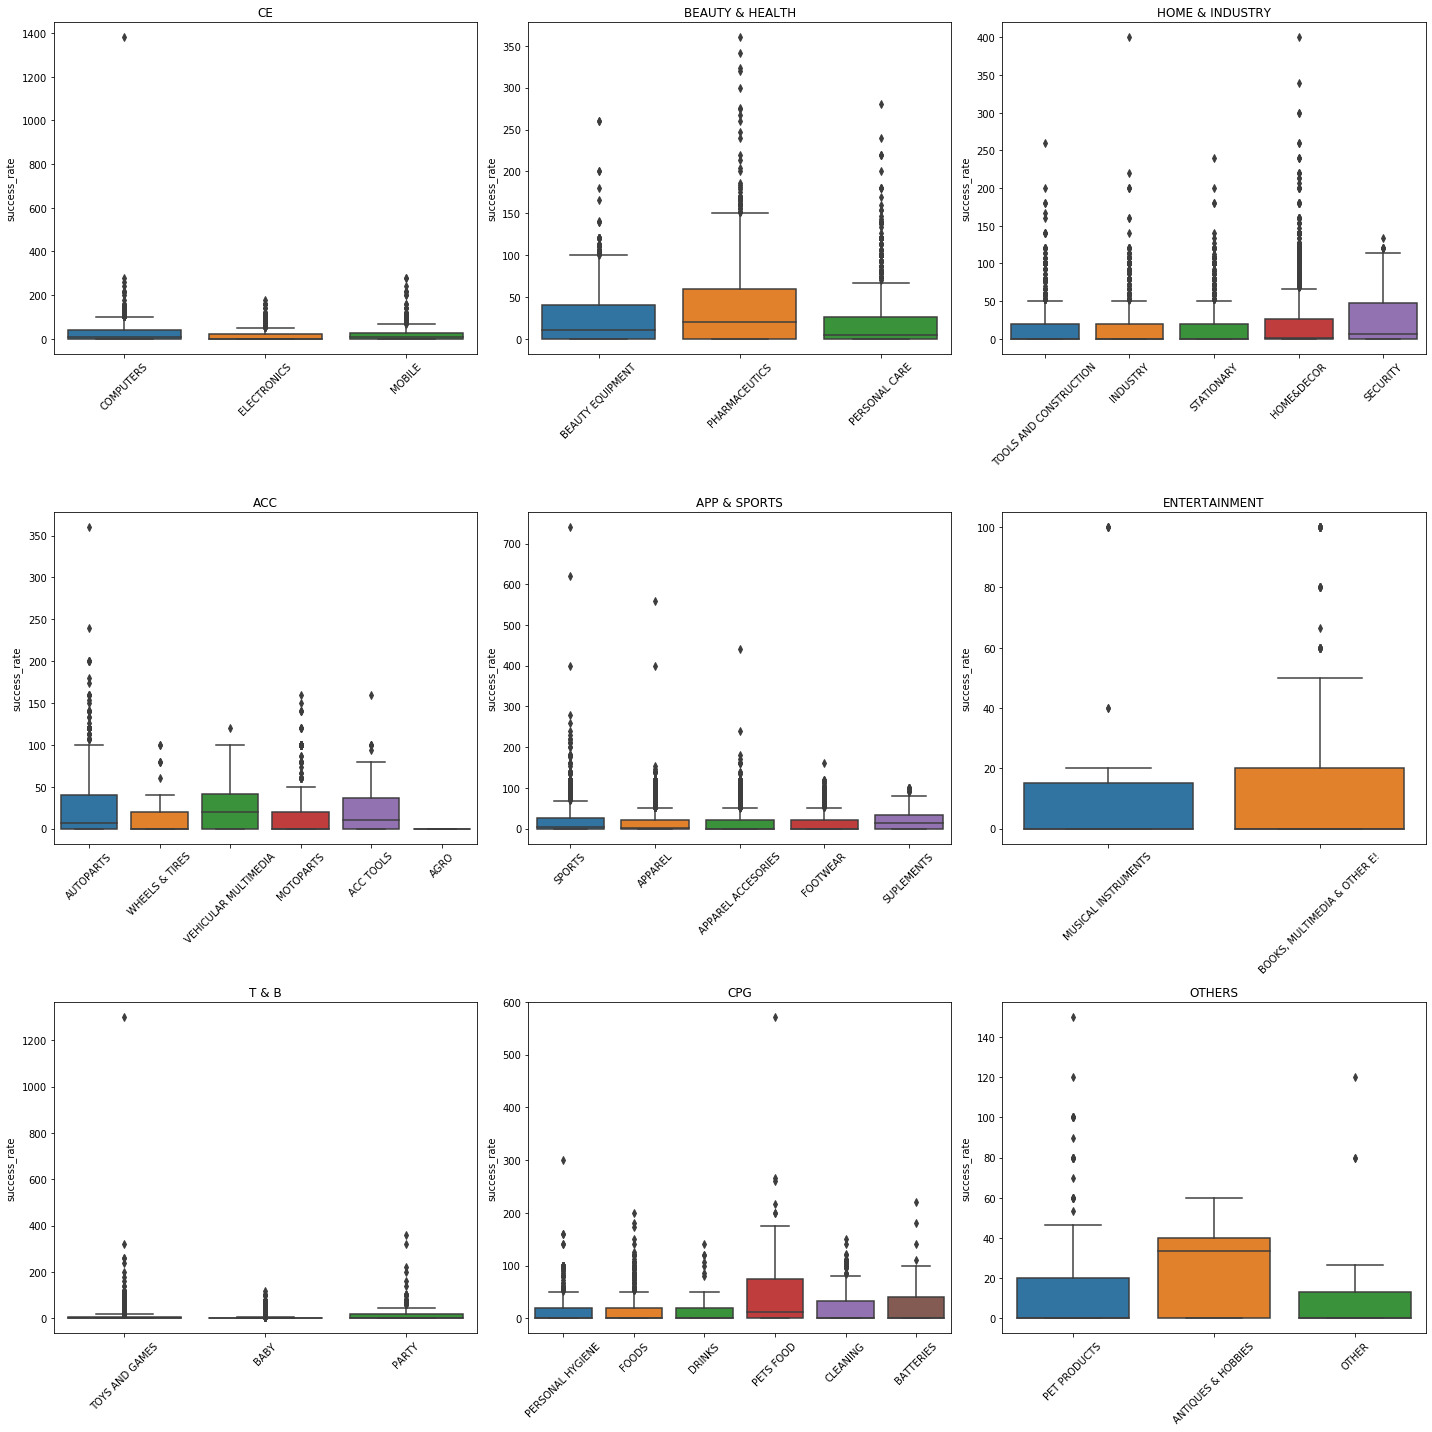

In [29]:
sub_plots(df_ofertas, 'VERTICAL', 'DOM_DOMAIN_AGG1', 'success_rate', 'boxplot')

De los boxplots se puede observar que el único segmento que no tuvo tasas de éxito mayor a un 100% fue la de entretenimiento, donde las tasas estuvieron por debajo del 20% y la cantidad de outliers observados es baja. El segmento de others también tuvo valores de éxito bastante acotados, aunque en la categoría de hobbies y antigüedades su rango intercuartil llego a superar al 40% de éxito. Lo que es notable en todos los segmentos, es que los outliers en general indican que las cantidades vendidas fueron superiores a las cantidades que se ofrecieron.

A continuación se grafican los boxplots de las duraciones de las ofertas

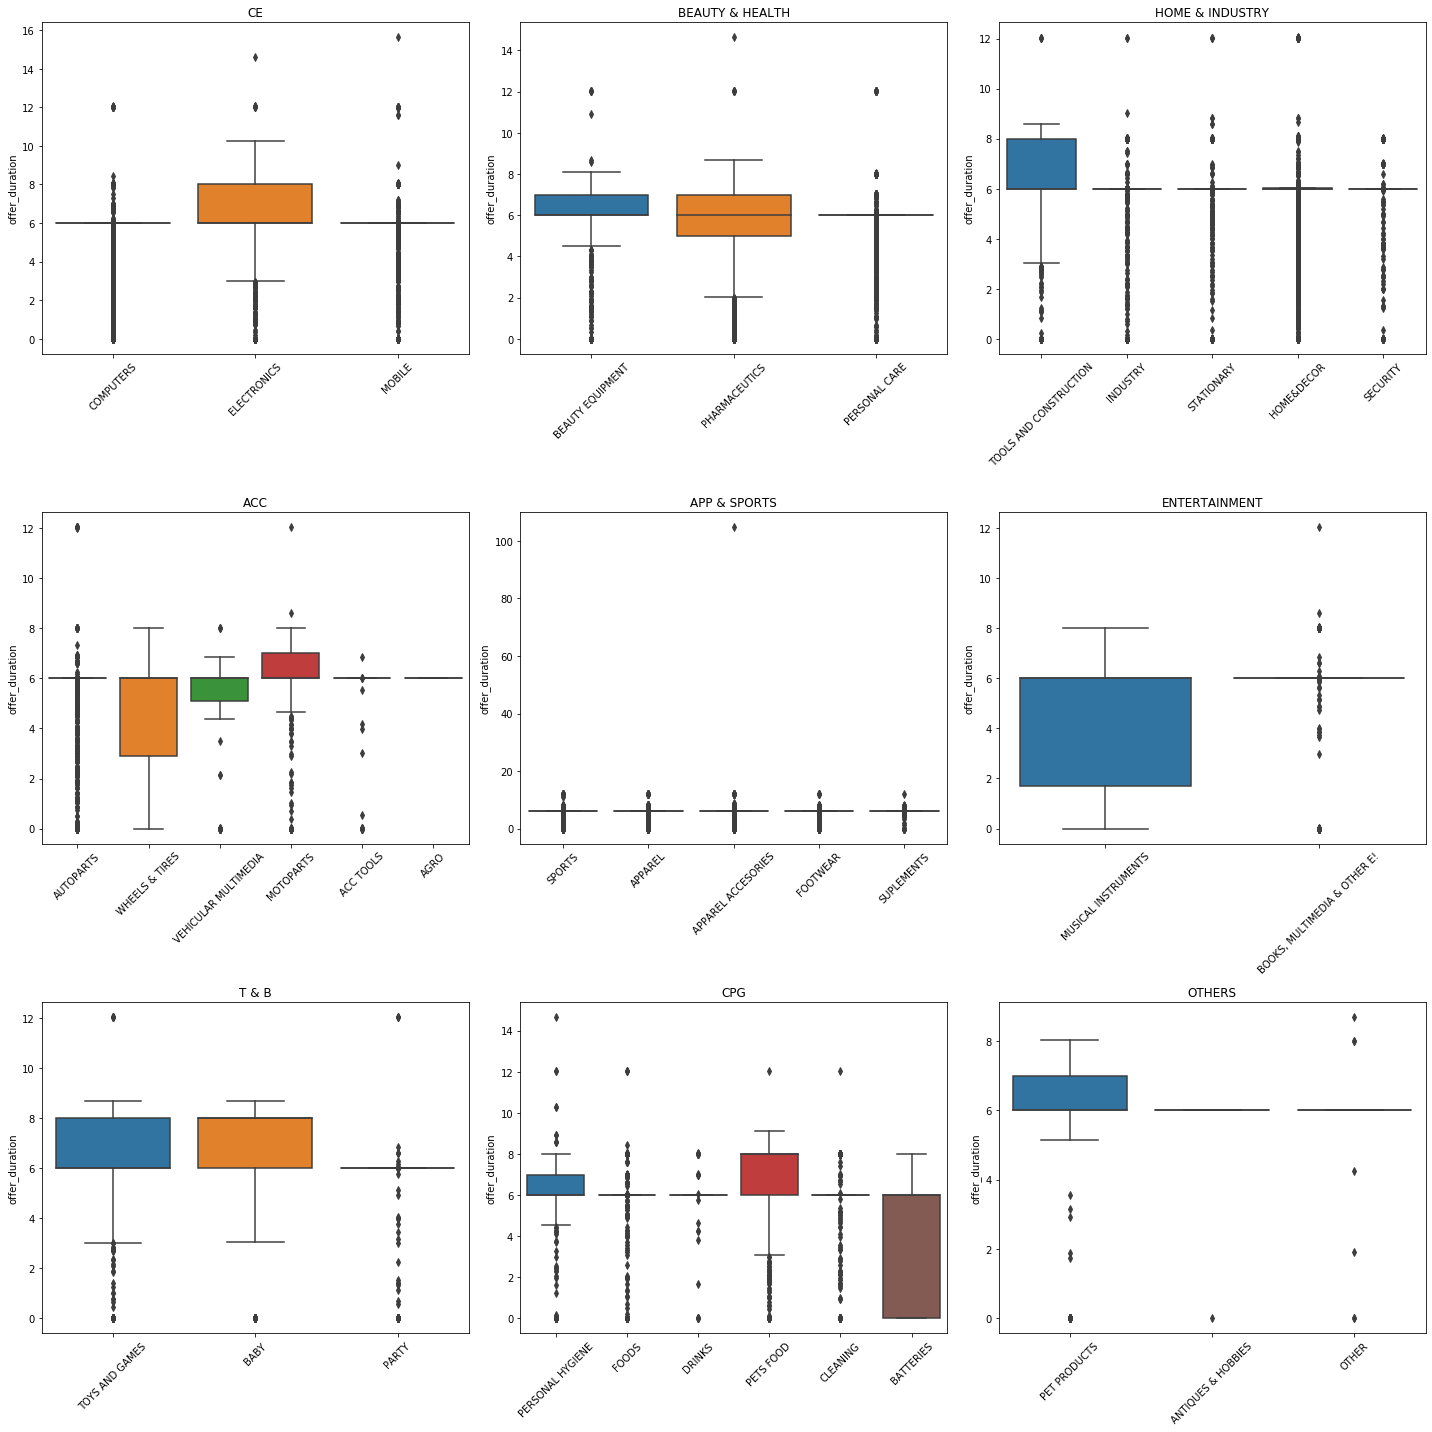

In [30]:
sub_plots(df_ofertas, 'VERTICAL', 'DOM_DOMAIN_AGG1', 'offer_duration', 'boxplot')

De los gráficos de los distintos segmentos se puede observar que las ofertas tuvieron una duración de entre 6 a 8 horas. El segmento con mayor paridad de duración de sus ofertas fue la de App & Sports, mientras que la mayor diferencia entre categorías de productos se dio en el segmento Entertainment. Es de destacar que dentro de la categoría de apparel & accesories, hubo una oferta que tuvo una duración superior a las 100 horas.

Los gráficos a continuación muestran las cantidades vendidas por segmento y categoría de producto

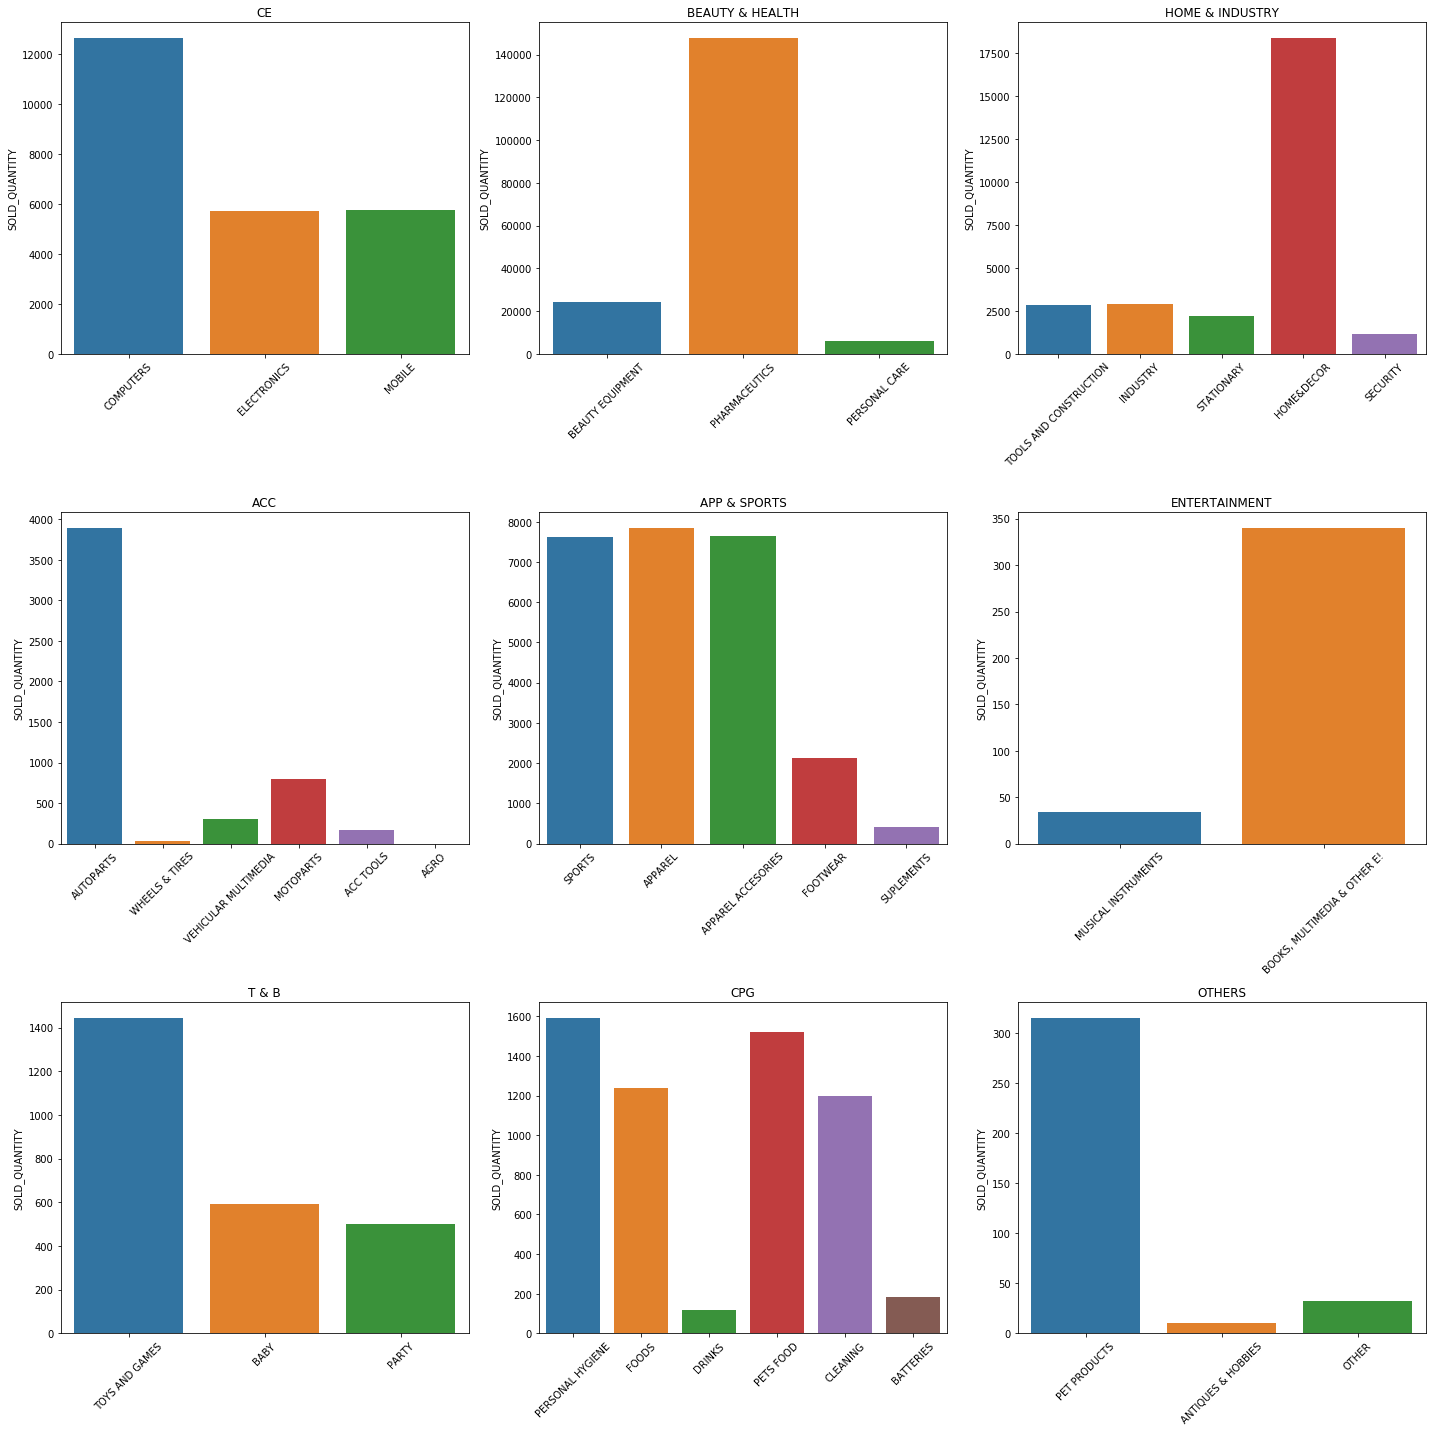

In [31]:
sub_plots(df_ofertas, 'VERTICAL', 'DOM_DOMAIN_AGG1', 'SOLD_QUANTITY', 'barplot')

De los gráficos de barras se puede observar que:
- La categoria de productos farmaceuticos fue el que tuvo mayor cantidad de unidades vendidas, superando 140 mil unidades
- Los segmentos de Entretenimiento y Otros fueron los que tuvieron menos cantidades vendidas
- En cada uno de los segmentos, siempre hubo una categoría predominante en términos de ventas por sobre las otras, con excepción de los segmentos App & Sports y CPG

Por último se realizara el heatmap de todas las ofertas sin diferenciar por segmento y/o categoria

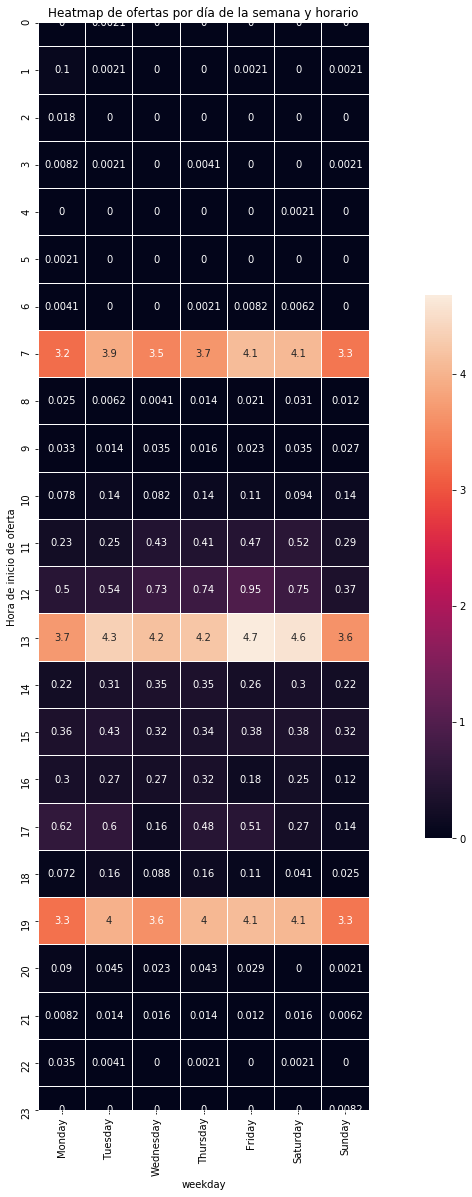

In [32]:
##Se crea la tabla cruzada de horarios y dias, asi como tambien se ordenan las columnas
df_offers_crosstab = pd.crosstab(df_ofertas['offer_hour_start'], df_ofertas['weekday'], normalize=True) * 100
df_offers_crosstab = df_offers_crosstab[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

##Se genera el heatmap a partir de la tabla cruzada
ax = plt.figure(figsize=(20,20))
ax = sns.heatmap(df_offers_crosstab, annot=True, linewidth=0.01, linecolor='w', square=True, cbar_kws={"shrink": 0.5})
ax.set(title=f'Heatmap de ofertas por día de la semana y horario', ylabel= 'Hora de inicio de oferta');

Del heatmap se observa que la mayor proporción de ofertas se dan en 3 horarios: 7, 13 y 19 horas. Por otra parte, al analizar los días, se puede determinar que los días donde hay más ofertas son los días Viernes y Sabados.

## Principales conclusiones

A partir del análisis exploratorio realizado se puede decir que:
- La información contiene datos de ofertas relampago que comprenden principalmente el período Junio y Julio de 2021
- Se corresponde a 1266 productos, los cuales se agrupan en 36 categorías y éstas pertenecen a 9 segmentos.
- Casi un tercio de los productos tuvieron ofertas que comprendieron (no que duraron) 30 días o más.
- De los 1266 productos, 853 productos tuvieron más de 1 oferta relampago.
- Si se considera el origen de los productos, los productos importados casi que duplican la cantidad de productos de origen nacional (1047 versus 657)
- La mayoría de las ofertas tuvieron modalidad de envío gratuito (26 mil versus 22 mil)
- Si se considera la tasa de éxito (esto es cantidades vendidas respecto a cantidades involucradas en la oferta) se puede observar que el único segmento que no tuvo tasas de éxito mayor a un 100% fue la de entretenimiento, donde las tasas estuvieron por debajo del 20% y la cantidad de outliers observados es baja. El segmento de others también tuvo valores de éxito bastante acotados, aunque en la categoría de hobbies y antigüedades su rango intercuartil llego a superar al 40% de éxito. Lo que es notable en todos los segmentos, es que los outliers en general indican que las cantidades vendidas fueron superiores a las cantidades que se ofrecieron.
- Las ofertas tuvieron una duración de entre 6 a 8 horas. El segmento con mayor paridad de duración de sus ofertas fue la de App & Sports, mientras que la mayor diferencia entre categorías de productos se dio en el segmento Entertainment.
- La categoria de productos farmaceuticos fue el que tuvo mayor cantidad de unidades vendidas, superando 140 mil unidades. Los segmentos de Entretenimiento y Otros fueron los que tuvieron menos cantidades vendidas.
- Al evaluar cuando se realizan las ofertas, se puede determinar que en general (no se realizó un analisis por segmento y/o categoría) las mismas comienzan principalmente a las 7, 13 y 19, concentrandose en los días Viernes y Sábados.